In [281]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot,show

In [282]:
file = open("/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/RNEMD_11.rnemd")

In [283]:
lines =  file.readlines()
z = []
T = []
for line in lines:
    if line[0] != '#':
        words = line.split()
        z.append(float(words[0]))
        T.append(float(words[1]))
    

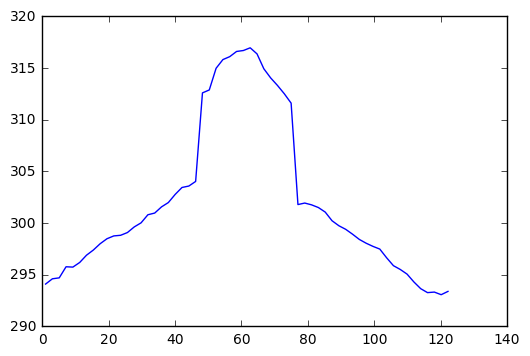

In [284]:
plot(z,T)
show()


In [285]:
def thermalConductance(fileName, z1w, z1m, z2m, z2w, flux_omd ):
    rnemdFile = open(fileName)
    lines = rnemdFile.readlines()
    z = []
    T = []
    for line in lines:
        if line[0] != '#':
            word = line.split()
            z.append(float(word[0]))
            T.append(float(word[1]))
    
    zArray = np.array(z)
    TArray = np.array(T)
    
    t1m = TArray[zArray == z1m]
    t2m = TArray[zArray == z2m]
    t1w = TArray[zArray == z1w]
    t2w = TArray[zArray == z2w]
    
    g_omd1 = flux_omd/(t1m-t1w)
    g_omd2 = flux_omd/(t2m-t2w)
    
    G_conversion_factor = 6.95e8
    
    G1 = g_omd1 * G_conversion_factor
    G2 = g_omd2 * G_conversion_factor
    
    return G1, G2
    
    
    
    
    

In [286]:
thermalConductance("/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/RNEMD_11.rnemd",46.202008,48.25543,74.949923,77.003346,3e-6)

(array([243.289129]), array([212.44120932]))

In [287]:
def average_error_thermalConductance(path,fileList,z1w, z1m, z2m, z2w, flux_omd):
    G = []
    for rnemd in fileList:
        rnemdFile = path + rnemd
        g = thermalConductance(rnemdFile,z1w, z1m, z2m, z2w, flux_omd)
        G.append(g[0])
        G.append(g[1])
    
    average_G = np.mean(G)
    error_G = 1.96 * np.std(G)/np.sqrt(len(G))
    return average_G, error_G, np.std(G)

In [288]:
rnemdList = []
for counter in range(1,6):
    rnemdList.append("RNEMD_1%d.rnemd"%(counter))

In [289]:
rnemdList

['RNEMD_11.rnemd',
 'RNEMD_12.rnemd',
 'RNEMD_13.rnemd',
 'RNEMD_14.rnemd',
 'RNEMD_15.rnemd']

In [290]:
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/"
z1w, z1m, z2m, z2w = 46.202008,48.25543,74.949923,77.003346
flux_omd = 3e-6

average_error_thermalConductance(path, rnemdList,z1w, z1m, z2m, z2w, flux_omd)

(257.21898300804725, 11.48083611121735, 18.52326099722298)

In [291]:
# RNEMD 1
## non fq water non fq gold

rnemdList = []
for counter in range(1,6):
    rnemdList.append("RNEMD_1%d.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/"
z1w, z1m, z2m, z2w = 46.202008,48.25543,74.949923,77.003346
flux_omd = 3e-6

average_error_thermalConductance(path, rnemdList,z1w, z1m, z2m, z2w, flux_omd)

(257.21898300804725, 11.48083611121735, 18.52326099722298)

In [292]:
# RNEMD 2
## non fq water fq gold

rnemdList = []
for counter in range(1,6):
    rnemdList.append("RNEMD_2%d.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/"
z1w, z1m, z2m, z2w = 46.202008,48.25543,74.949923,77.003346
flux_omd = 3e-6

average_error_thermalConductance(path, rnemdList,z1w, z1m, z2m, z2w, flux_omd)

(261.571715951978, 12.313979250145698, 19.86745994413914)

In [293]:
# RNEMD 3
## fq water no fq gold

rnemdList = []
for counter in range(1,6):
    rnemdList.append("RNEMD_3%d.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/"
z1w, z1m, z2m, z2w = 46.202008,48.25543,74.949923,77.003346
flux_omd = 3e-6

average_error_thermalConductance(path, rnemdList,z1w, z1m, z2m, z2w, flux_omd)

(252.16856144421814, 13.810419616383111, 22.2818272604283)

In [294]:
from scipy import stats
def thermalConductivity(fileName, zBoundary, flux_omd, area,plotShow = False ):
    rnemdFile = open(fileName)
    lines = rnemdFile.readlines()
    z = []
    T = []
    z1, z2 = zBoundary
    for line in lines:
        if line[0] != '#':
            word = line.split()
            z.append(float(word[0]))
            T.append(float(word[1]))
    
    zArray = np.array(z)
    TArray = np.array(T)
    
    
    
    t_sel = TArray[np.logical_and(zArray > z1, zArray < z2)]
    z_sel = zArray[np.logical_and(zArray > z1, zArray < z2)]
    print(len(z_sel))
    if plotShow:
        plot(z_sel,t_sel,'o')
        show()
    slope, intercept, r_value, p_value, std_err = stats.linregress(z_sel,t_sel)
    
    x = np.linspace(min(zArray), max(zArray), 1000)
    y = slope *x + intercept
    plot(zArray,TArray,'o')
    plot(x,y)
    show()
    
    
    lambda_omd = flux_omd / abs(slope)
    lambda_convesion = 0.06947 * 1e6
    lambda_standard = lambda_omd * lambda_convesion
    
    
    
    return lambda_standard,abs(slope), r_value

19


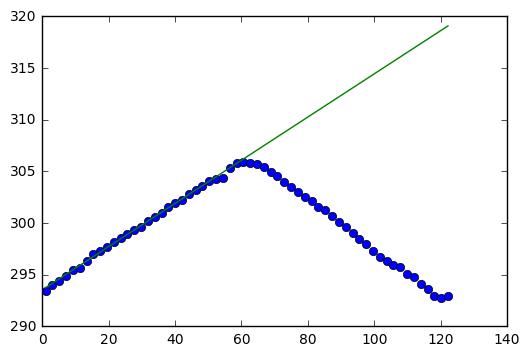

(0.9969505554059048, 0.20904747870384266, 0.9989949022582748)

In [295]:
water1 = [6.16027, 46.202008 ]
water2 = [77.003346, 123.2053535 - 6.16027]
metal1 = [48.25543, 55.4424]
metal2 = [67.7629, 74.949923 ]
area = 39.975673 * 23.079965

thermalConductivity("/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/RNEMD_51_NVT.rnemd",water1, 3e-6, area )

19


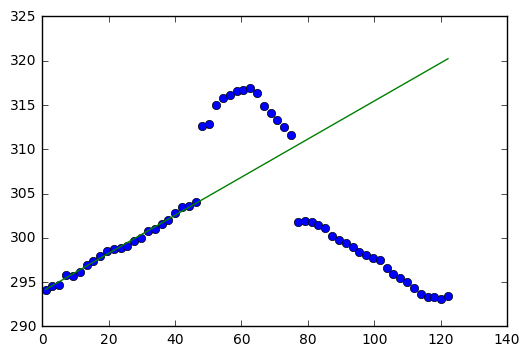

(0.9691429275566981, 0.21504568013040298, 0.994864383225501)

In [296]:
thermalConductivity("/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/RNEMD_11.rnemd",water1, 3e-6, area )

In [297]:
def average_error_thermalConductivity(path, fileList, zBoundary1, zBoundary2, area, flux_omd, plotShow = False):
    Lambda = []
    for rnemd in fileList:
        rnemdFile = path + rnemd
        Lambda_standard1, slope1, r_value1 = thermalConductivity(rnemdFile, zBoundary1, flux_omd, area, plotShow)
        Lambda_standard2, slope2, r_value2 = thermalConductivity(rnemdFile, zBoundary2, flux_omd, area, plotShow)
        Lambda.append(Lambda_standard1)
        Lambda.append(Lambda_standard2)
        
    
    average_Lambda = np.mean(Lambda)
    error_Lambda = 1.96 * np.std(Lambda)/np.sqrt(len(Lambda))
    return average_Lambda, error_Lambda

In [265]:
Lambda_standard1 = 1

19


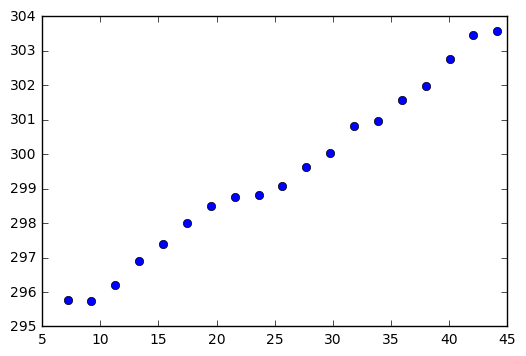

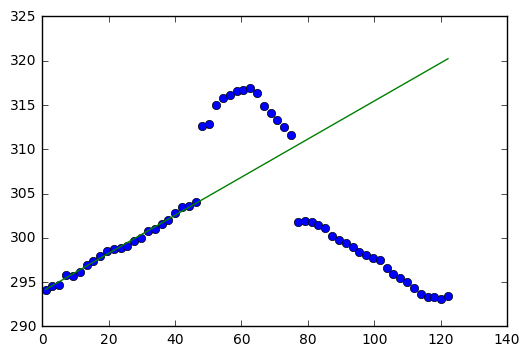

19


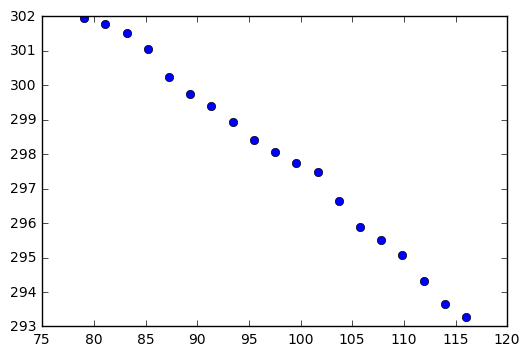

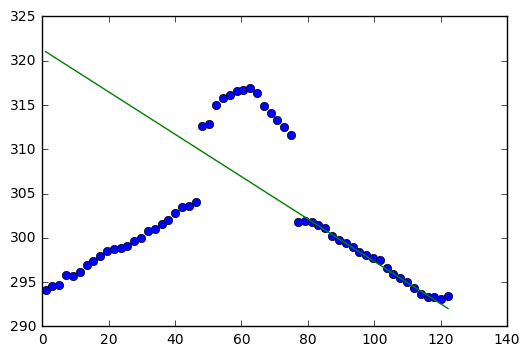

19


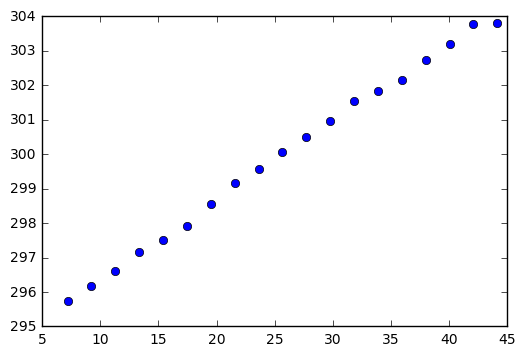

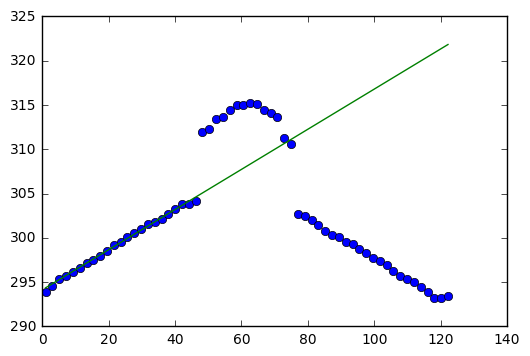

19


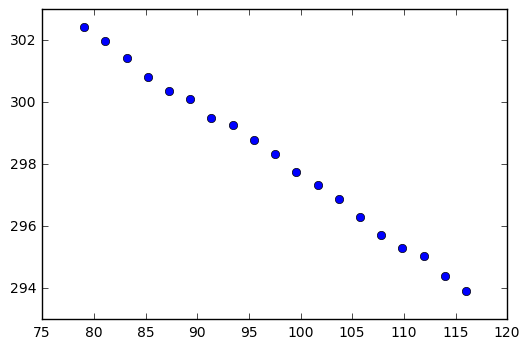

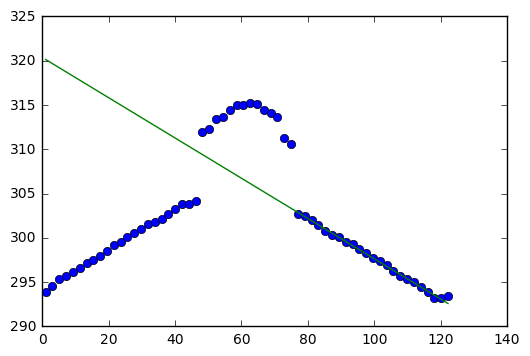

19


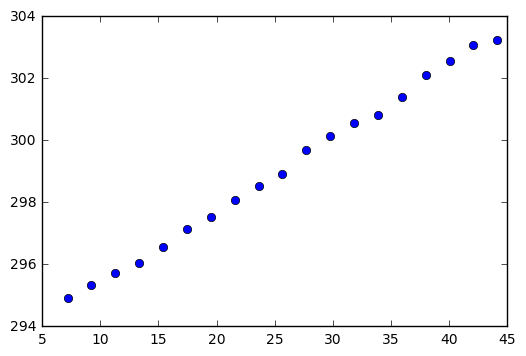

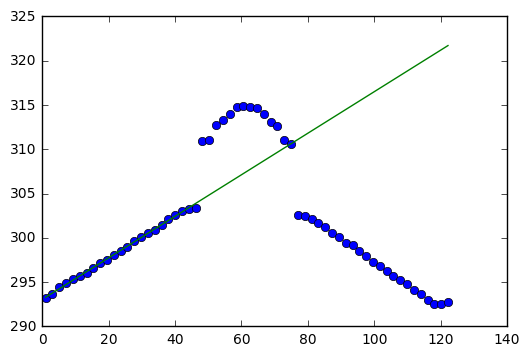

19


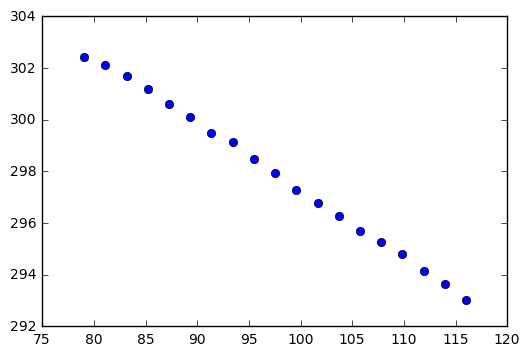

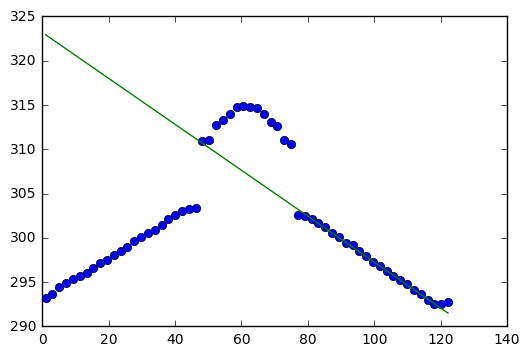

19


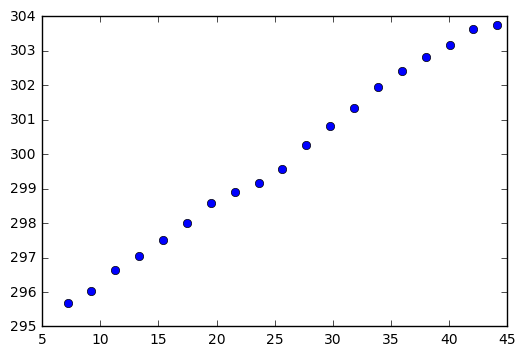

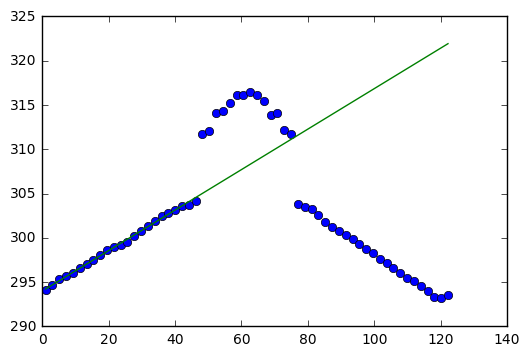

19


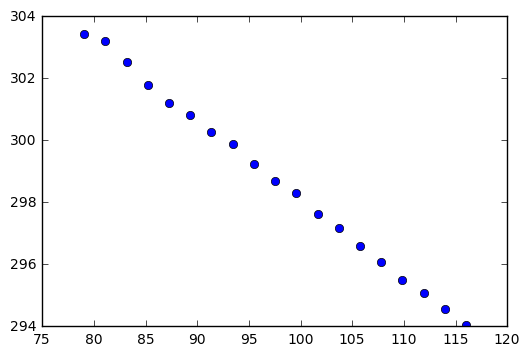

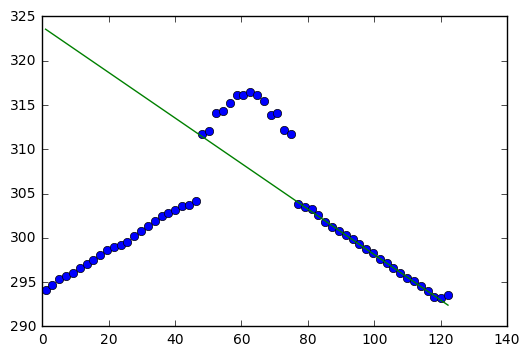

19


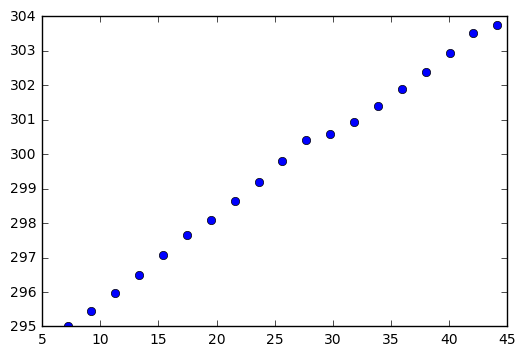

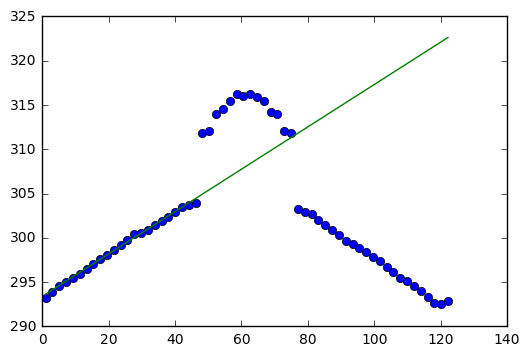

19


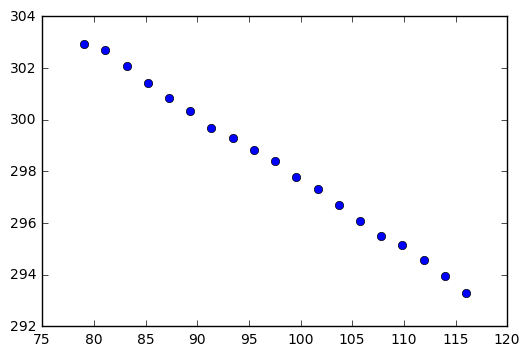

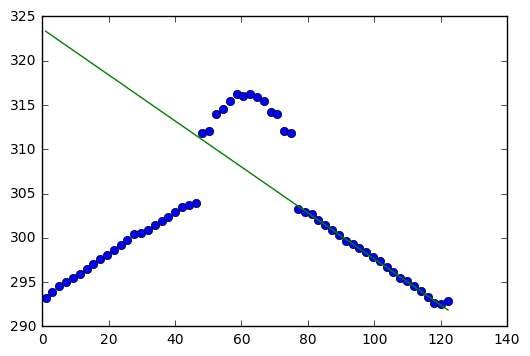

(0.8762439433583348, 0.03319085563212818)

In [298]:
# RNEMD 1
## non fq water non fq gold
water1 = [6.16027, 46.202008 ]
water2 = [77.003346, 123.2053535 - 6.16027]
metal1 = [48.25543, 55.4424]
metal2 = [67.7629, 74.949923 ]
area = 39.975673 * 23.079965

rnemdList = []
for counter in range(1,6):
    rnemdList.append("RNEMD_1%d.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/"
flux_omd = 3e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd, True)

19


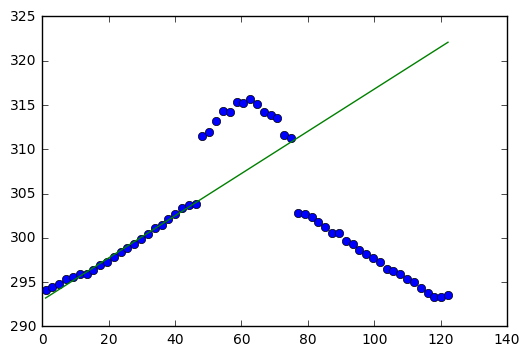

19


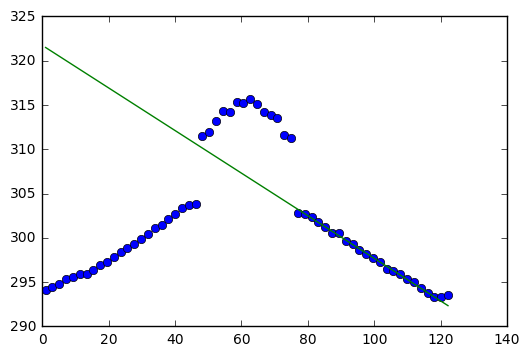

19


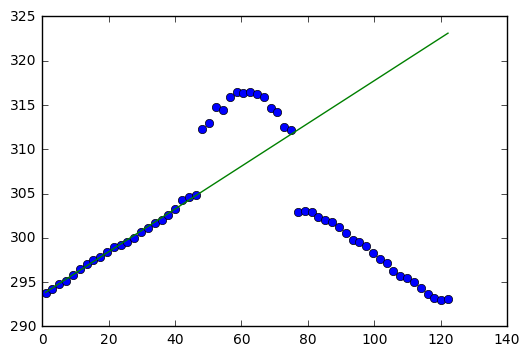

19


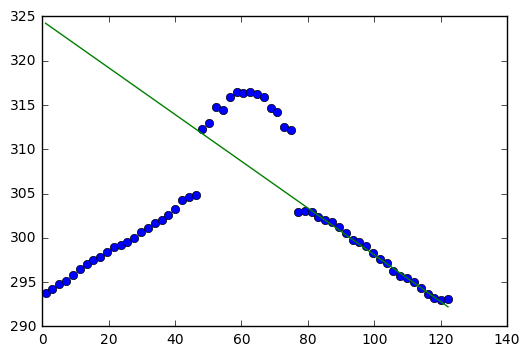

19


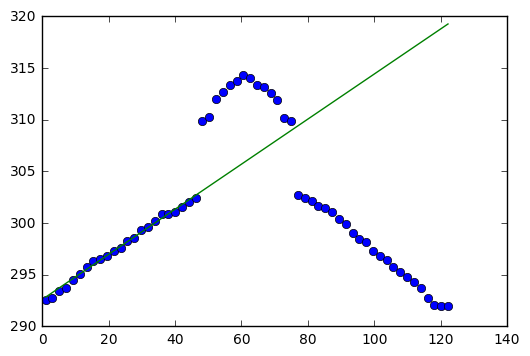

19


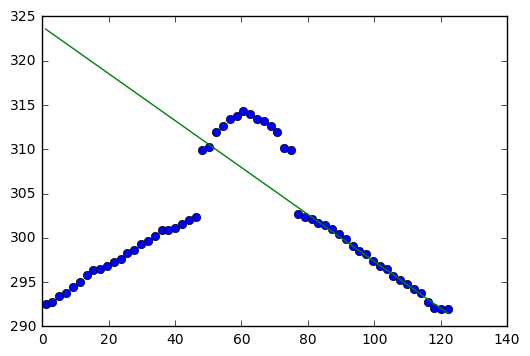

19


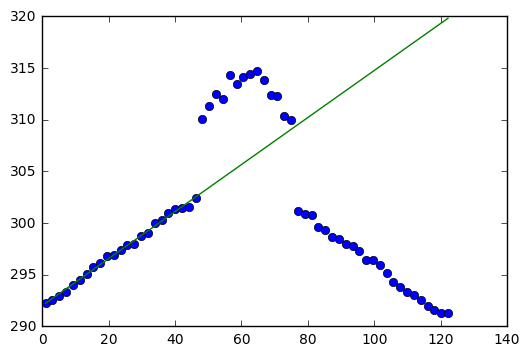

19


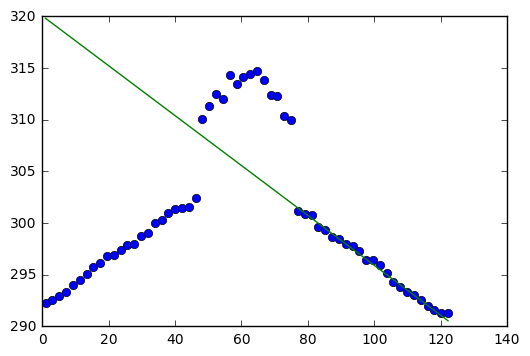

19


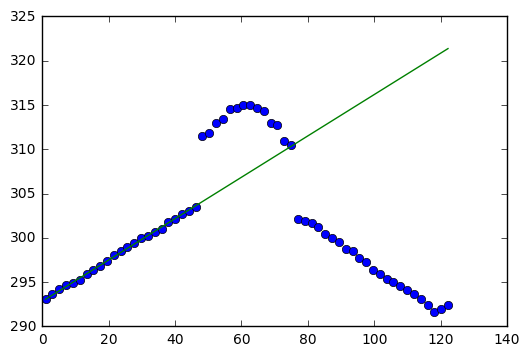

19


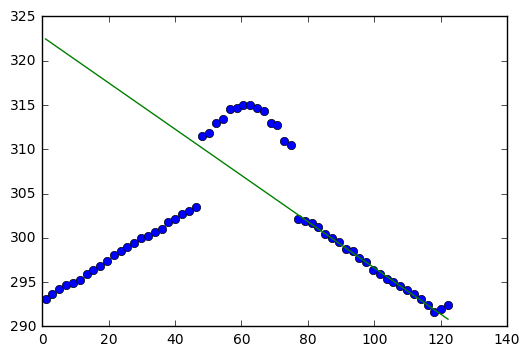

(0.8601805992870449, 0.03264914795678347)

In [299]:
# RNEMD 1
## non fq water fq gold
water1 = [6.16027, 46.202008 ]
water2 = [77.003346, 123.2053535 - 6.16027]
metal1 = [48.25543, 55.4424]
metal2 = [67.7629, 74.949923 ]
area = 39.975673 * 23.079965

rnemdList = []
for counter in range(1,6):
    rnemdList.append("RNEMD_2%d.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/"
flux_omd = 3e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

24


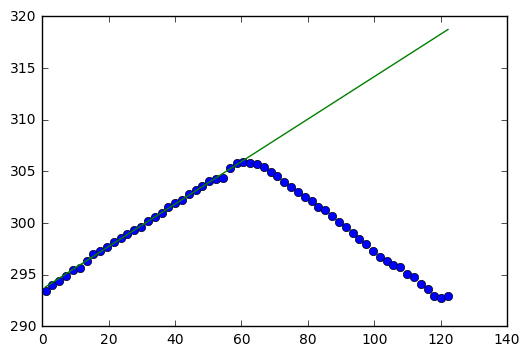

24


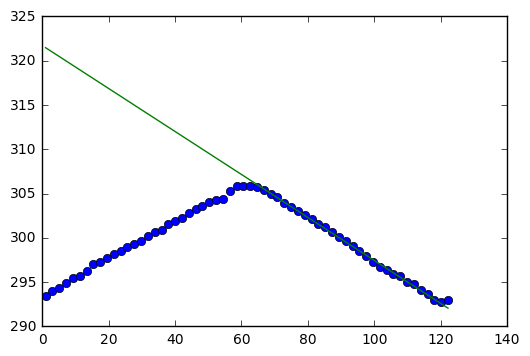

24


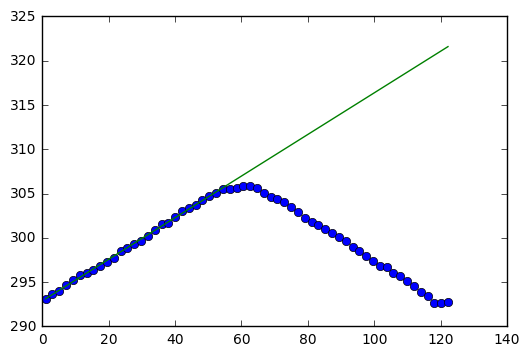

24


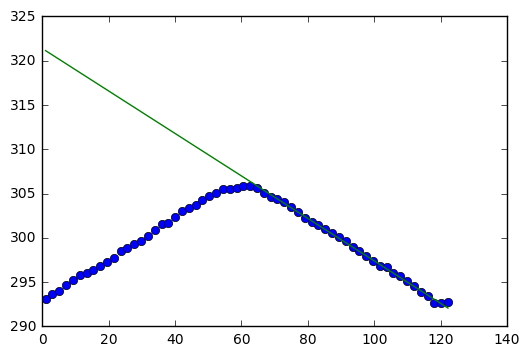

24


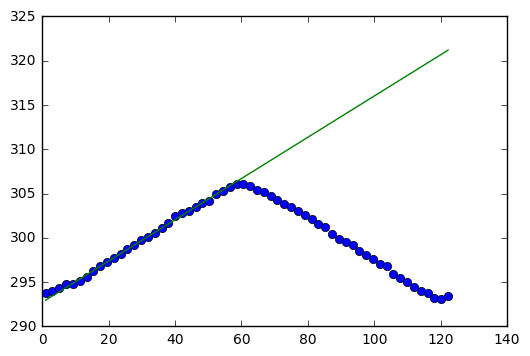

24


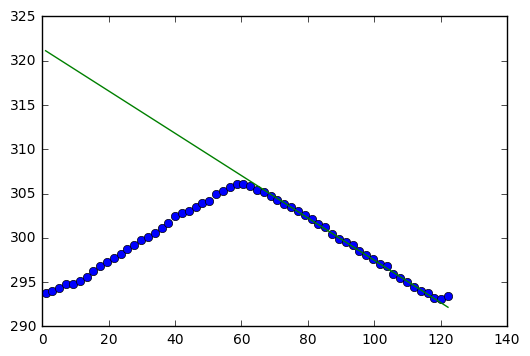

24


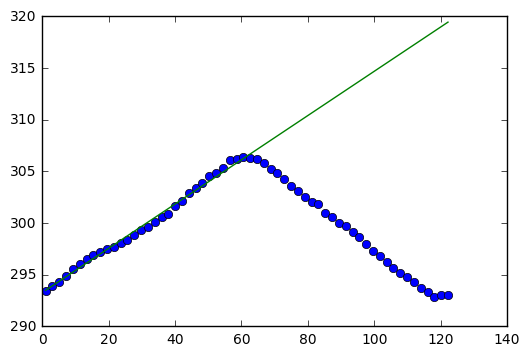

24


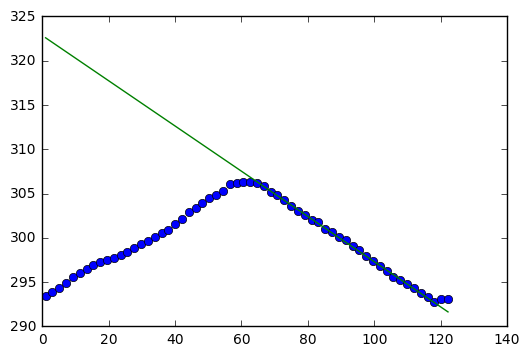

24


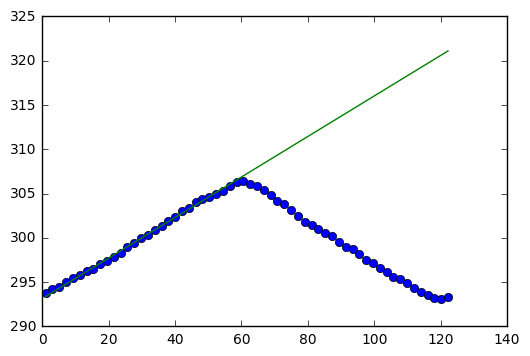

24


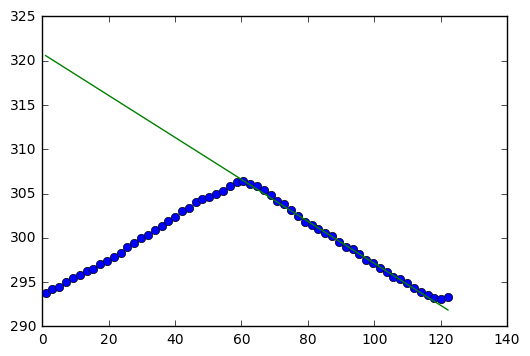

(0.8972344203908549, 0.03365068242467089)

In [300]:
# RNEMD 1
## fq water 
water1 = [6.16027, 55.4424 ]
water2 = [67.7629, 123.2053535 - 6.16027]
area = 39.975673 * 23.079965

rnemdList = []
for counter in range(1,6):
    rnemdList.append("RNEMD_5%d_NVT.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/"
flux_omd = 3e-6

average_error_thermalConductivity(path, rnemdList, water1, water2, area, flux_omd)

### For metals

3


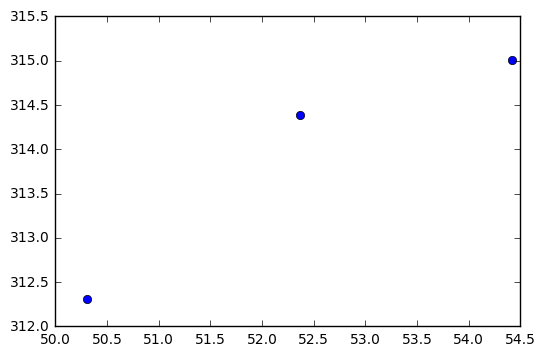

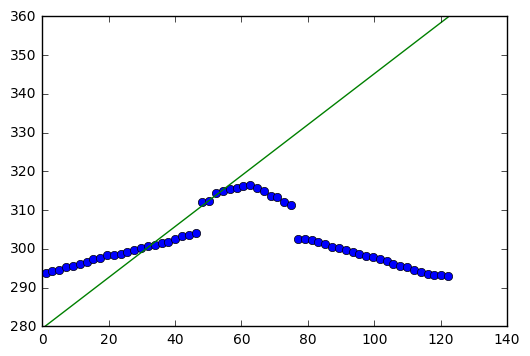

3


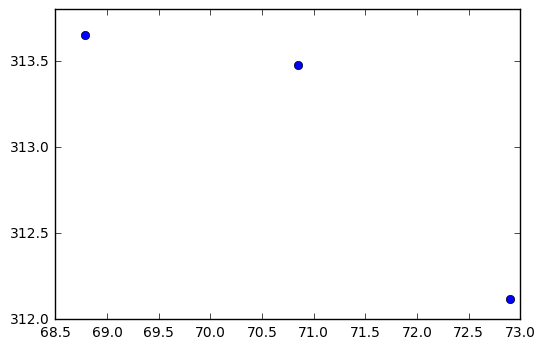

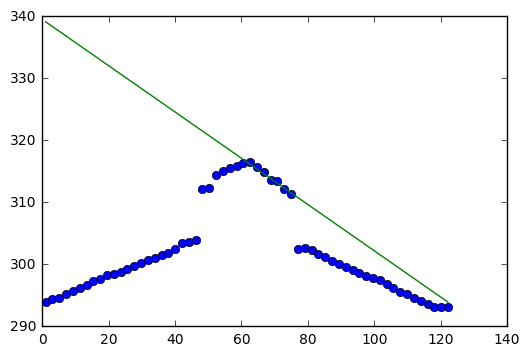

3


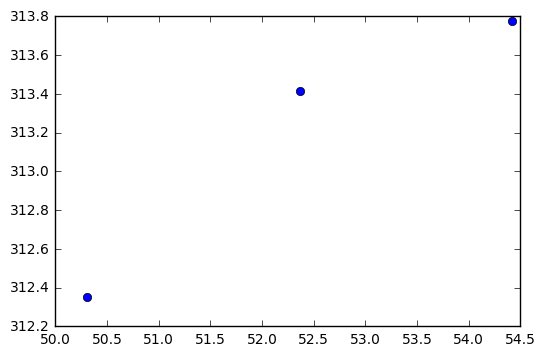

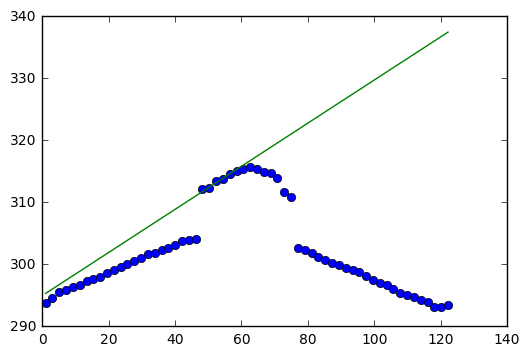

3


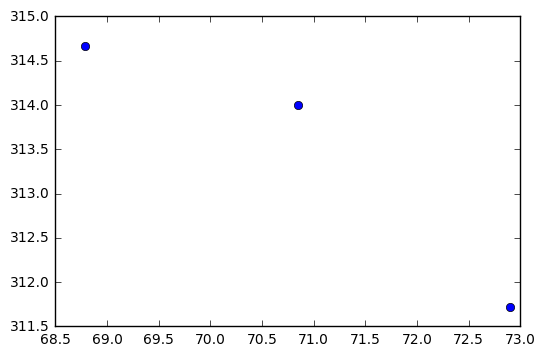

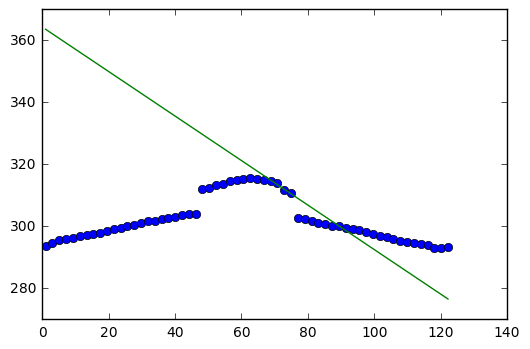

3


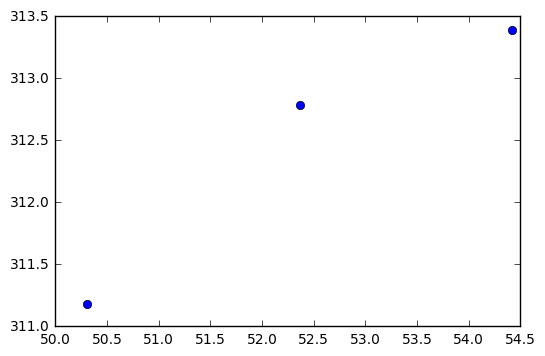

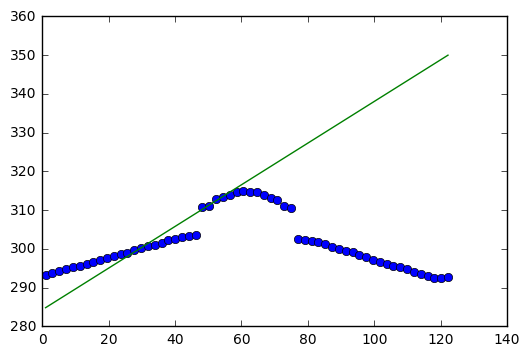

3


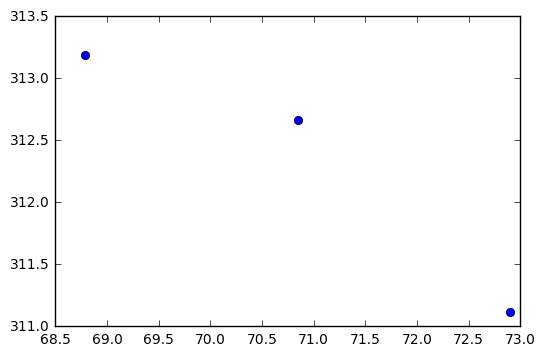

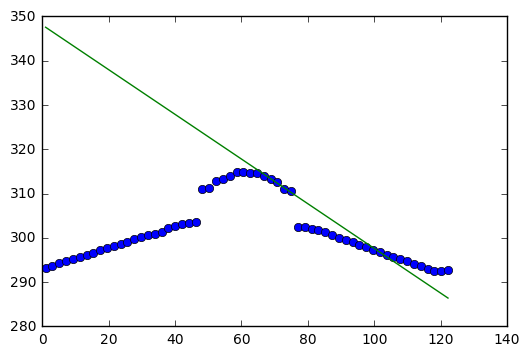

3


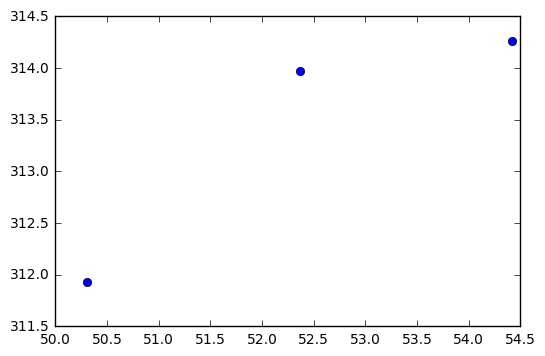

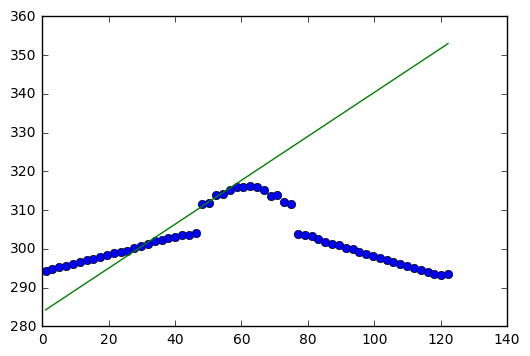

3


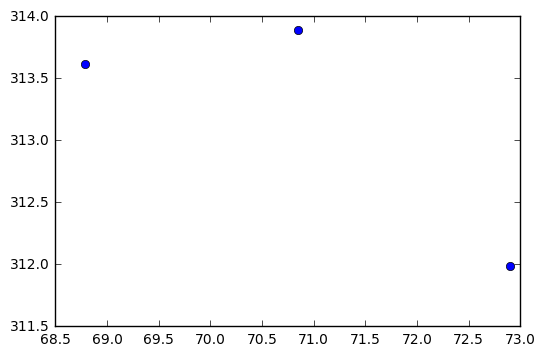

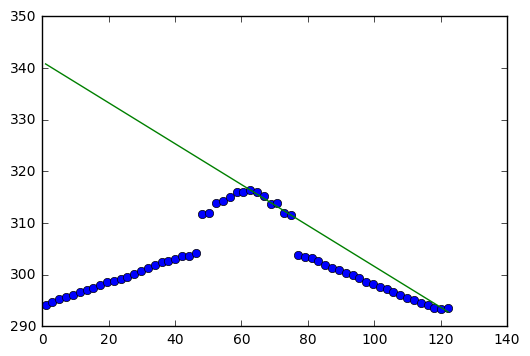

3


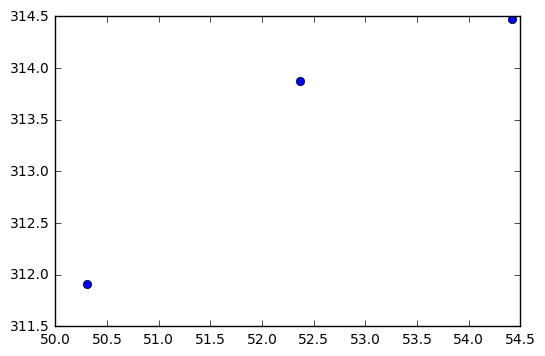

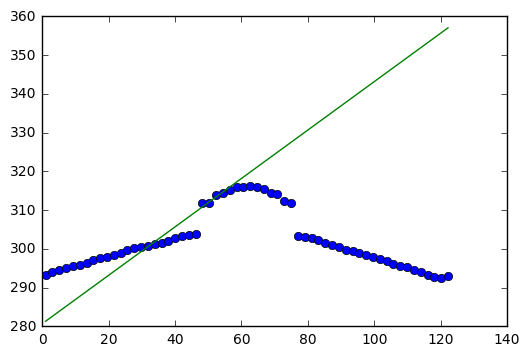

3


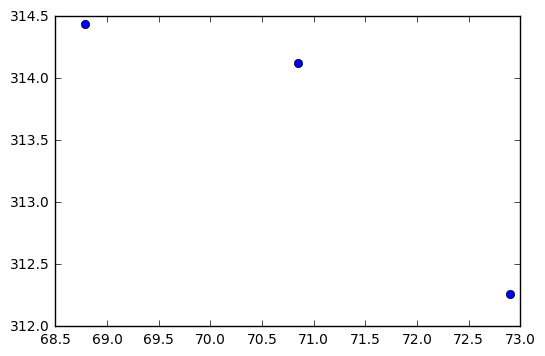

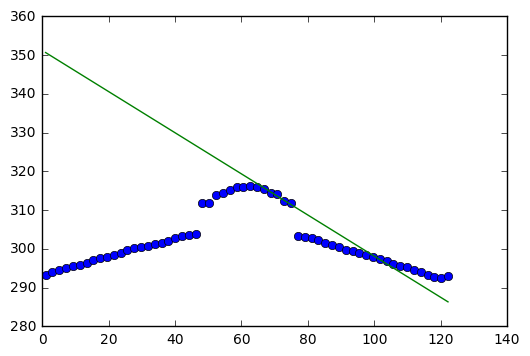

(0.418460216540118, 0.06262630510916105)

In [269]:
# RNEMD 1
## non fq water non fq gold
water1 = [6.16027, 46.202008 ]
water2 = [77.003346, 123.2053535 - 6.16027]
metal1 = [48.25543, 55.4424]
metal2 = [67.7629, 74.949923 ]
area = 39.975673 * 23.079965

rnemdList = []
for counter in range(1,6):
    rnemdList.append("RNEMD_1%d.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/"
flux_omd = 3e-6

average_error_thermalConductivity(path, rnemdList, metal1, metal2, area, flux_omd, True)

3


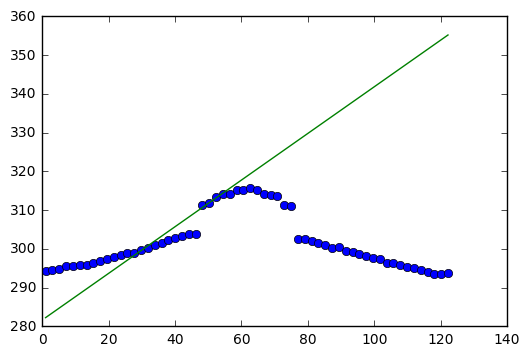

3


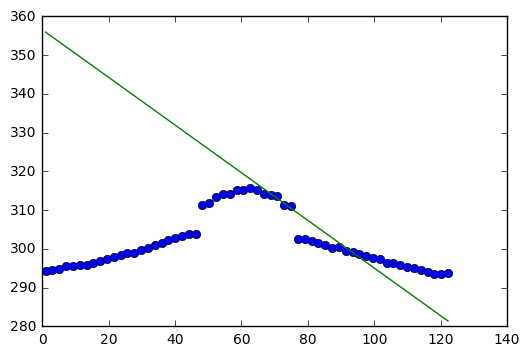

3


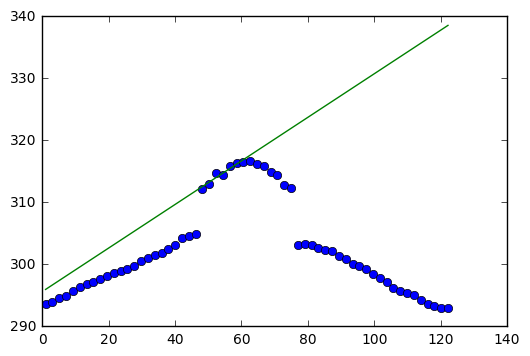

3


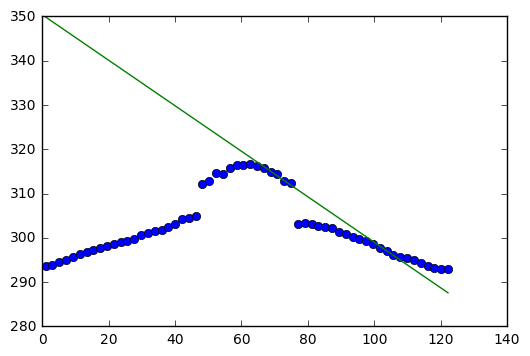

3


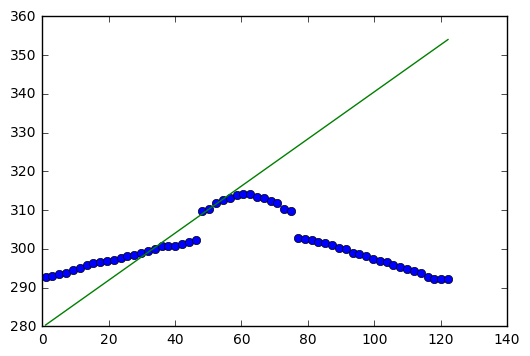

3


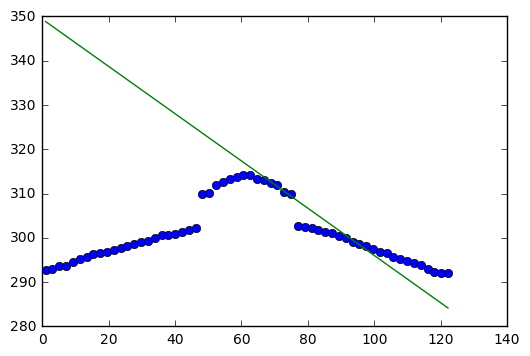

3


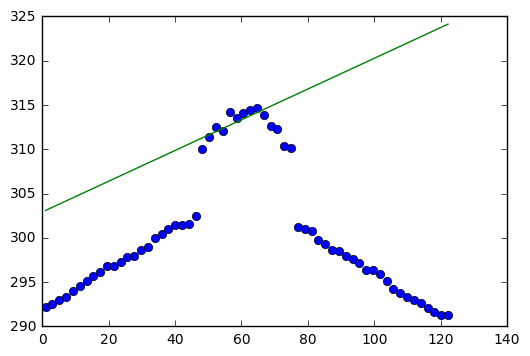

3


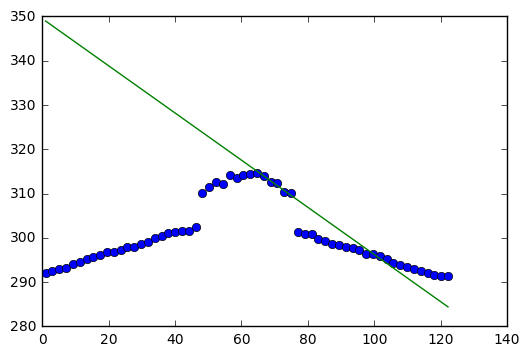

3


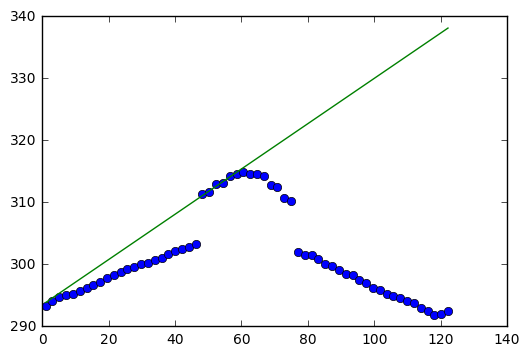

3


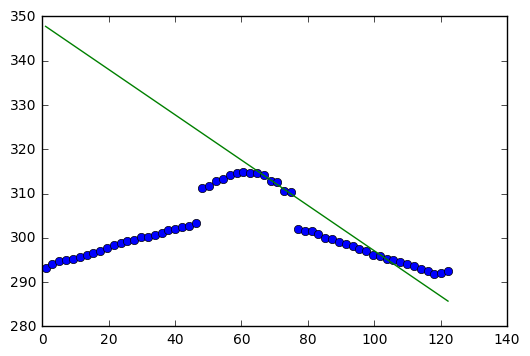

(0.4985373871791882, 0.15439056571197896)

In [270]:
# RNEMD 1
## non fq water - fq gold
water1 = [6.16027, 46.202008 ]
water2 = [77.003346, 123.2053535 - 6.16027]
metal1 = [48.25543, 55.4424]
metal2 = [67.7629, 74.949923 ]
area = 39.975673 * 23.079965

rnemdList = []
for counter in range(1,6):
    rnemdList.append("RNEMD_2%d.rnemd"%(counter))
path = "/home/hbhattar/groupspace/hbhattar/Planar/RNEMD/"
flux_omd = 3e-6

average_error_thermalConductivity(path, rnemdList, metal1, metal2, area, flux_omd)